
The WD mass density is given by (Eq. 2.3.14 of ST83)
$$
\rho = \rho_0 x^3
$$
with
$$
x \equiv \frac{p_{\rm F}}{m_ec},\quad \rho_0 = 1.9479 \times 10^6 \left(\frac{\mu_e}{2}\right) {\rm g/cm^3} .
$$
The electron degenerate pressure is given by (Eq. 2.3.5 of ST83)
$$
P_e = P_0 \phi(x)
$$
with
$$ P_0 = 1.4218 \times 10^{25}~{\rm dyne/cm^2}, \quad \phi(x) = \frac{1}{8\pi^2} \left\{ x \sqrt{1+x^2} \left(\frac{2}{3}x^2-1\right) + \ln\left[ x + \sqrt{1+x^2} \right] \right\} . $$
We further reparameterize the radius $r$ as
$$ r = r_0 \xi .$$
Then the Poisson equation (Eq. 3.3.1 of ST83) becomes
\begin{equation}
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \frac{\xi^2 \phi^\prime}{x^3} \frac{dx}{d\xi} \right) = -x^3 ,
\end{equation}
with
$$ r_0 = \sqrt{\frac{P_0}{4\pi G \rho_0^2}} = 2.11 \times 10^9 {\rm cm}\left (\frac{\mu_e}{2}\right)^{-1},\quad \phi^\prime \equiv \frac{d\phi}{dx} = \frac{x^4}{3\pi^2 \sqrt{1+x^2}} .$$
(Note the derivative of $\phi(x)$ can be easily done with **mathematica**.)
The above equation is not a Lane--Emden equation because the EoS of ideal Fermi gas does not follow a polytropic form of EoS.

In order to solve the above second-order differential equation (Eq. 1) numerically with [**scipy.integrate.odeint**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), we rewrite the original equation into a group of two first-order differential equations by introducing a new variable $y$
$$ \frac{dx}{d\xi} = \frac{3\pi^2 y \sqrt{1+x^2}}{\xi^2 x},\quad \frac{dy}{d\xi} = -\xi^2 x^3 .$$
(Matlab also has ODE solvers that are easy to use: [ODE Solver in Matlab](https://www.mathworks.com/help/matlab/math/choose-an-ode-solver.html))

To avoid singularities at $x=0$ (which is reached at the surface of the WD), we further introduce $z\equiv x^2$ and rewritten the above equations
$$ \frac{dz}{d\xi} = \frac{6\pi^2 y \sqrt{1+z}}{\xi^2},\quad \frac{dy}{d\xi} = -\xi^2 z^{3/2} .$$
The initial conditions are
$$ x(\xi=0)=\left(\frac{\rho_{\rm c}}{\rho_0}\right)^{1/3}, \quad \left.\frac{dx}{d\xi}\right|_{\xi=0}=0 $$
Thus
$$ z(\xi=0)=\left(\frac{\rho_{\rm c}}{\rho_0}\right)^{2/3}, \quad y(\xi=0)=0.$$
The derivative $dz/d\xi$ reaches another singularity at $\xi=0$. This can be avoided by making use of the above initial conditions
$$ \left. \frac{dz}{d\xi} \right|_{\xi\rightarrow 0} = -2 \pi^2 \sqrt{1+z} z^{3/2} \xi $$

The following piece of python code solves the above differential equations.

Text(0, 0.5, '$100|y|$ or $z$')

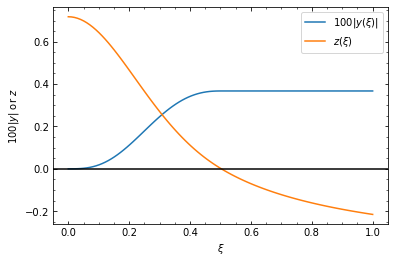

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def derivatives(f, t, epsilon=1e-6):
    ''' f=(y, z) is a vector to be solved; t is xi in the above equations. '''
    y, z = f

    if z<0: # density becomes negative-->unphysical, meaning the outer boundary has reached
        dydt = 0
        dzdt = 6*np.pi**2*y/t**2
        return dydt, dzdt

    dydt = -t**2 * z**1.5
    if t < epsilon: # to avoid singularity at t=0
        dzdt = -2*np.pi**2 * np.sqrt(1+z) * z**1.5 * t
    else:
        dzdt = 6*np.pi**2 * y * np.sqrt(1+z)/t**2
    return dydt, dzdt

xc = 0.8472 # dimensionless mass density at the center of WD
f0 = [0, xc**2] # initial condition for the 1st-order differential equations
t_array = np.linspace(0, 1, 100)
f_array = odeint(derivatives, f0, t_array)

y_array = f_array[:, 0]
z_array = f_array[:, 1]

plt.plot(t_array, np.abs(y_array)*100, label=r'$100|y(\xi)|$')
plt.plot(t_array, z_array, label=r'$z(\xi)$')
plt.axhline(0, color='k')
plt.legend(loc=0)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$100|y|$ or $z$')

The WD surface is reached when $x=0$ (thus $z=0$). The corresponding values of $\xi$ and $y$ are denoted as $\xi_1$ and $y_1$, respectively.

The WD radius is given by
$$ R = r_0 \xi_1 $$
The WD total mass is given by
$$ M = \int_0^R 4\pi r^2 \rho dr = 4\pi \rho_0 r_0^3 \int_0^{\xi_1} \xi^2 x^3 d\xi = 4\pi \rho_0 r_0^3 |y_1| $$
The evaluation in the above equation has made use of the properties of the differential equations.

Additionally, the WD central density is
$$ \rho_c = \rho_0 x_0^3 $$